In [415]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [416]:
# Read Loan Dataset
loan_data=pd.read_csv("train.csv")

In [417]:
# Copy of original data
loan_data_original=loan_data.copy()

In [418]:
# Features in the dataset
loan_data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

We have 12 independent variables and 1 target variable, i.e. Loan_Status in the loan_data dataset

In [419]:
# Shape of the dataset
loan_data.shape

(614, 13)

![title](Datacolumns.PNG)

### Univariate analysis

In [420]:
loan_data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [421]:
# Normalize can be set to True to print proportions instead of number 
loan_data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

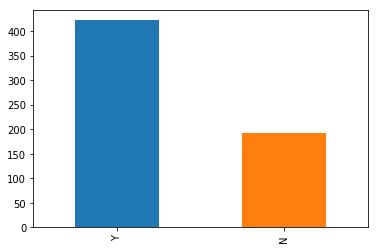

In [422]:
loan_data['Loan_Status'].value_counts().plot.bar()

The loan of 422(around 69%) people out of 614 was approved.

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

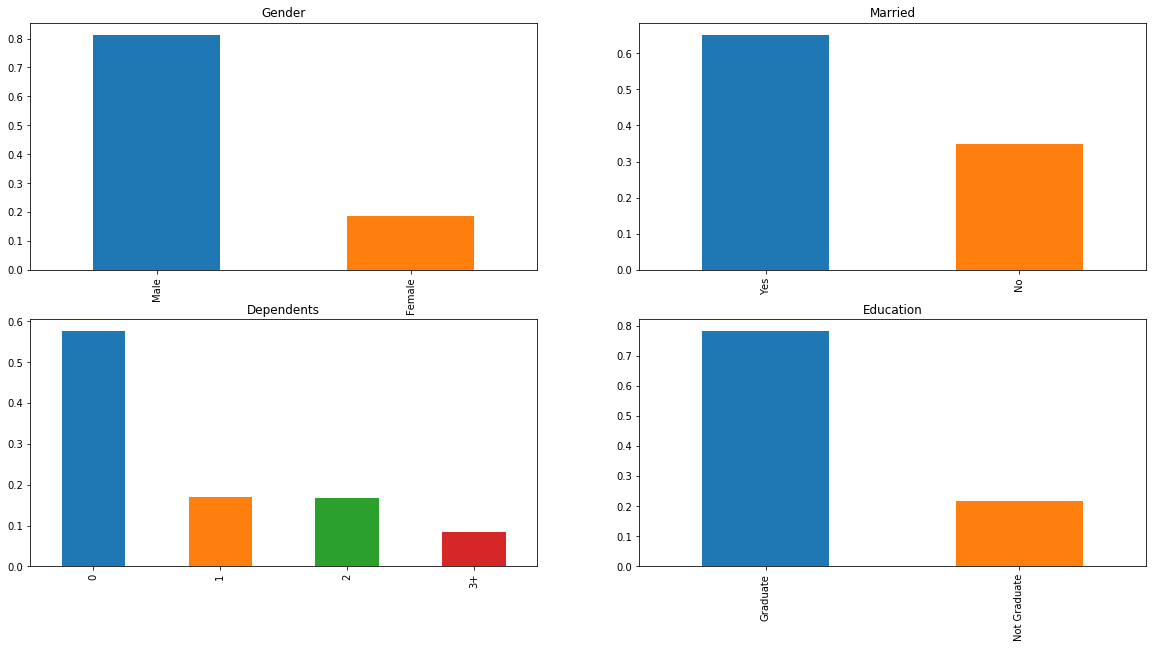

In [423]:
# Visualizing categorical features
plt.figure(1)
plt.subplot(221)
loan_data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender')

plt.subplot(222)
loan_data['Married'].value_counts(normalize=True).plot.bar(title= 'Married')

plt.subplot(223)
loan_data['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents')

plt.subplot(224)
loan_data['Education'].value_counts(normalize=True).plot.bar(title= 'Education')

plt.show()

It can be inferred from the above bar plots that:

80% applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
Around 15% applicants in the dataset are self employed.
Around 85% applicants have repaid their debts.

Independent Variable (Ordinal)

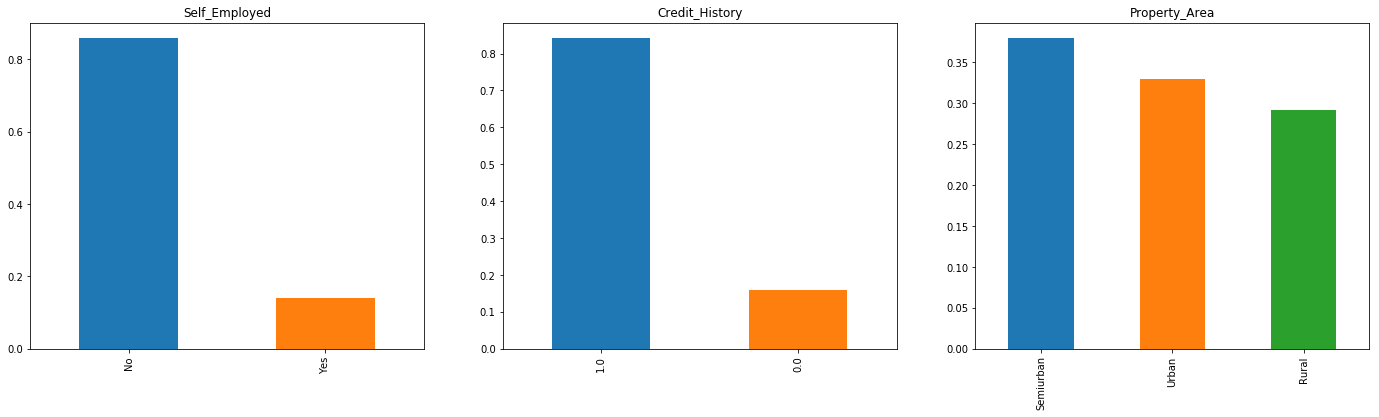

In [424]:
# Independent Variable (Ordinal)
plt.figure(1)
plt.subplot(131)
loan_data['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Self_Employed')

plt.subplot(132)
loan_data['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History')

plt.subplot(133)
loan_data['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')

plt.show()

Following inferences can be made from the above bar plots:

Most of the applicants don’t have any dependents.
Around 80% of the applicants are Graduate.
Most of the applicants are from Semiurban area.

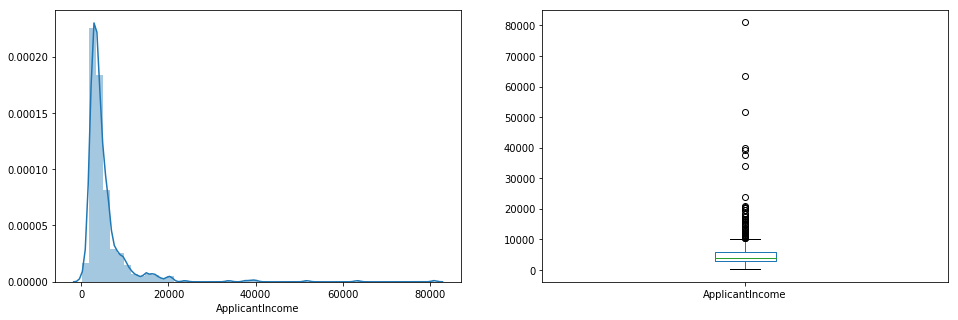

In [425]:
# Visualizing numerical features
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_data['ApplicantIncome']);

plt.subplot(122)
loan_data['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. Let us segregate them by Education:

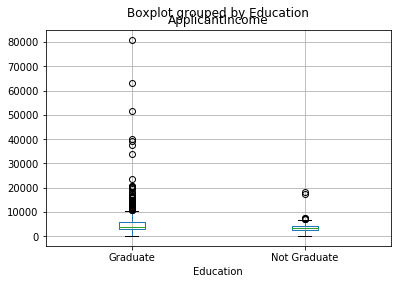

In [426]:
loan_data.boxplot(column='ApplicantIncome', by = 'Education')

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

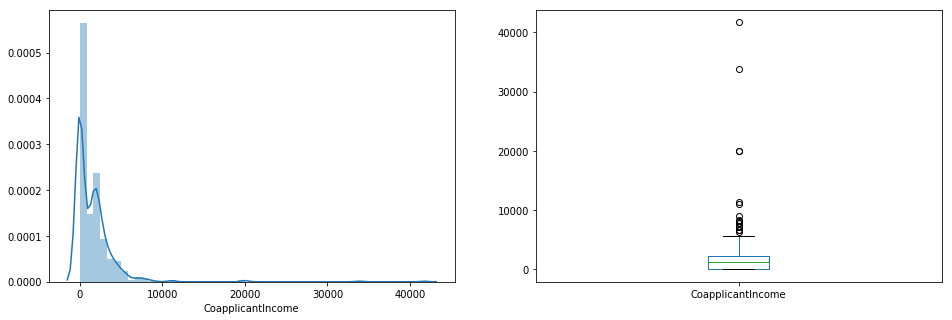

In [427]:
plt.figure(1)
plt.subplot(121)
sns.distplot(loan_data['CoapplicantIncome']);

plt.subplot(122)
loan_data['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Let’s look at the distribution of LoanAmount variable.

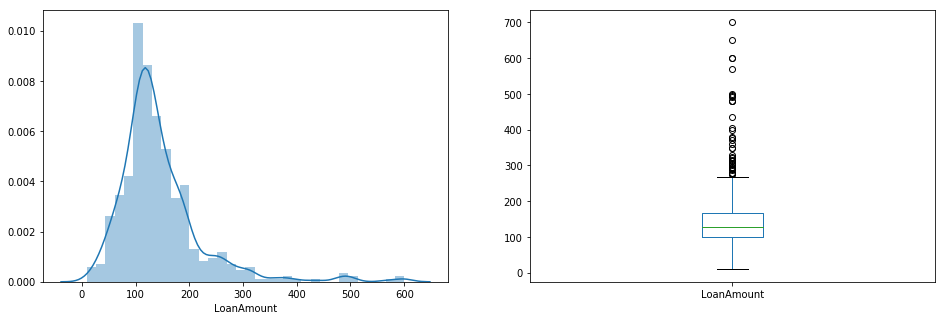

In [428]:
plt.figure(1)
plt.subplot(121)
df=loan_data.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
loan_data['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.

Now we would like to know how well each feature correlate with Loan Status. So, in the next section we will look at bivariate analysis.

### Bivariate Analysis

Loan_Status    N    Y
Gender               
Female        37   75
Male         150  339


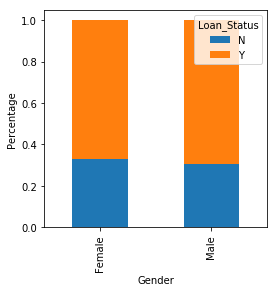

In [429]:
print(pd.crosstab(loan_data['Gender'],loan_data['Loan_Status']))

Gender=pd.crosstab(loan_data['Gender'],loan_data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Gender')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Married              
No            79  134
Yes          113  285


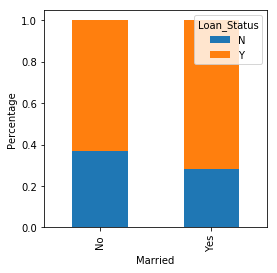

In [430]:
print(pd.crosstab(loan_data['Married'],loan_data['Loan_Status']))

Married=pd.crosstab(loan_data['Married'],loan_data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Married')
p = plt.ylabel('Percentage')

Loan_Status    N    Y
Dependents           
0            107  238
1             36   66
2             25   76
3+            18   33


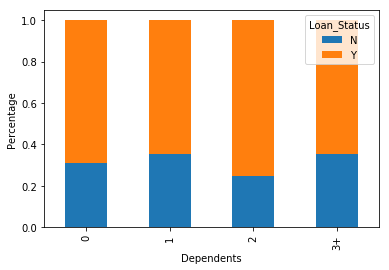

In [431]:
print(pd.crosstab(loan_data['Dependents'],loan_data['Loan_Status']))

Dependents=pd.crosstab(loan_data['Dependents'],loan_data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Dependents')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


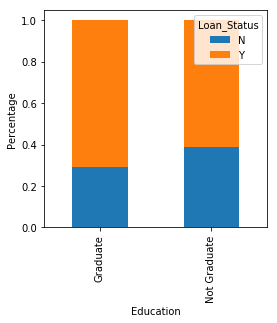

In [432]:
print(pd.crosstab(loan_data['Education'],loan_data['Loan_Status']))

Education=pd.crosstab(loan_data['Education'],loan_data['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Education')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56


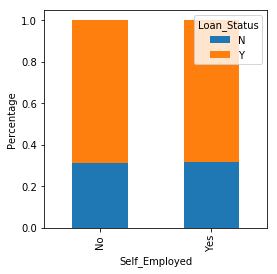

In [433]:
print(pd.crosstab(loan_data['Self_Employed'],loan_data['Loan_Status']))

Self_Employed=pd.crosstab(loan_data['Self_Employed'],loan_data['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Self_Employed')
p = plt.ylabel('Percentage')

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378


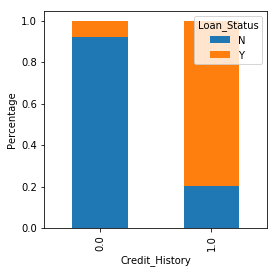

In [434]:
print(pd.crosstab(loan_data['Credit_History'],loan_data['Loan_Status']))

Credit_History=pd.crosstab(loan_data['Credit_History'],loan_data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.xlabel('Credit_History')
p = plt.ylabel('Percentage')

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


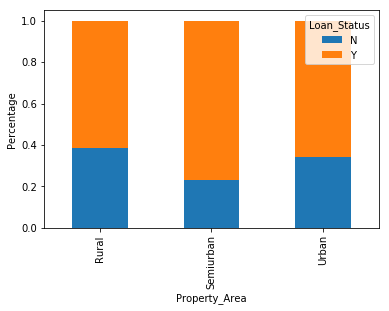

In [435]:
print(pd.crosstab(loan_data['Property_Area'],loan_data['Loan_Status']))

Property_Area=pd.crosstab(loan_data['Property_Area'],loan_data['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

In [436]:
# Making bins for Applicant income variable
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
loan_data['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)

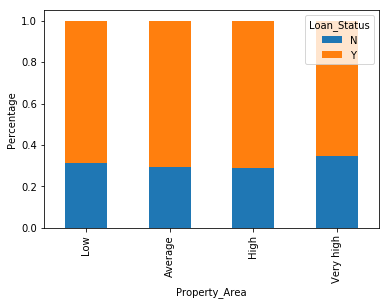

In [437]:
Income_bin=pd.crosstab(loan_data['Income_bin'],loan_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

In [438]:
# Making bins for Coapplicant income variable
bins=[0,1000,3000,42000]
group=['Low','Average','High']
loan_data['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)

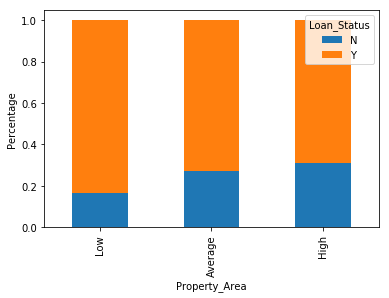

In [439]:
Coapplicant_Income_bin=pd.crosstab(loan_data['Coapplicant_Income_bin'],loan_data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

In [440]:
# Making bins for LoanAmount variable
bins=[0,100,200,700]
group=['Low','Average','High']
loan_data['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)

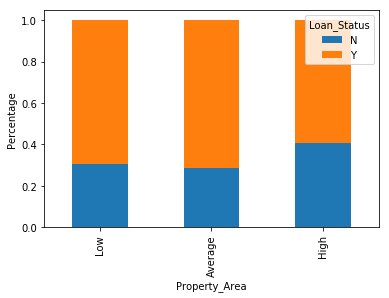

In [441]:
LoanAmount_bin=pd.crosstab(loan_data['LoanAmount_bin'],loan_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Property_Area')
P = plt.ylabel('Percentage')

In [442]:
# Drop the new variable of bins
loan_data=loan_data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin'], axis=1)

In [443]:
# # replacing 3+ in Dependents variable with 3
# # replacing Y and N in Loan_Status variable with 1 and 0 respectively
# loan_data['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
# loan_data['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 2, 3),inplace=True)
loan_data['Dependents'].value_counts()
# loan_data['Loan_.value_counts()Status'].replace('N', 0,inplace=True)
# loan_data['Loan_Status'].replace('Y', 1,inplace=True)

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

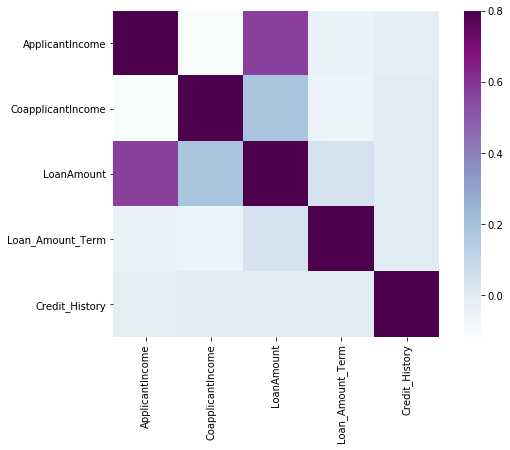

In [444]:
# Print correlation matrix
matrix = loan_data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

### Missing value and outlier treatment

In [445]:
# Checking the missing values
loan_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

For numerical variables: imputation using mean or median.

For categorical variables: imputation using mode.

There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed features so we can fill them using the mode of the features.

In [446]:
# replacing the missing values with the mode
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)

In [447]:
loan_data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable

In [448]:
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.


In [449]:
# Replace missing values
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(), inplace=True)

Now lets check whether all the missing values are filled in the dataset.

In [450]:
loan_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Outlier Treatment

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

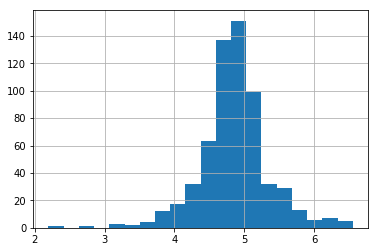

In [451]:
# Removing skewness in LoanAmount variable by log transformation
loan_data['LoanAmount_log'] = np.log(loan_data['LoanAmount'])
loan_data['LoanAmount_log'].hist(bins=20)
test['LoanAmount_log'] = np.log(test['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

## Feature Engineering

In [452]:
# Total_Income feature
loan_data['Total_Income']=loan_data['ApplicantIncome']+loan_data['CoapplicantIncome']

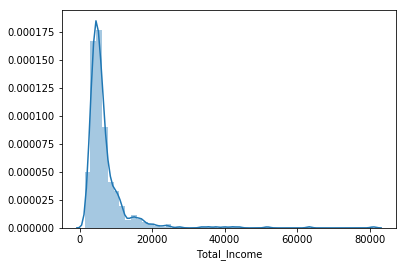

In [453]:
sns.distplot(loan_data['Total_Income']);

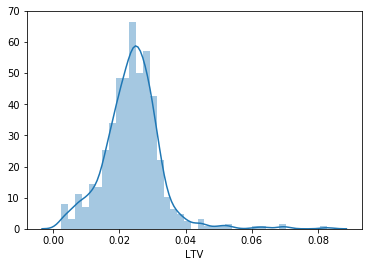

In [454]:
# Total_Income feature
loan_data['LTV']=loan_data['LoanAmount']/loan_data['Total_Income']
sns.distplot(loan_data['LTV']);

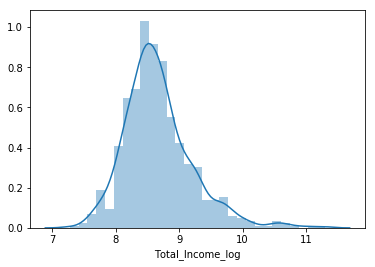

In [455]:
loan_data['Total_Income_log'] = np.log(loan_data['Total_Income'])
sns.distplot(loan_data['Total_Income_log']);

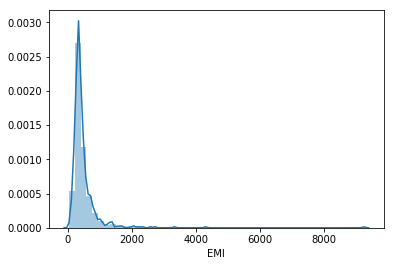

In [456]:
# EMI feature
loan_data['EMI']=(loan_data['LoanAmount']/loan_data['Loan_Amount_Term'])*1000
sns.distplot(loan_data['EMI']);

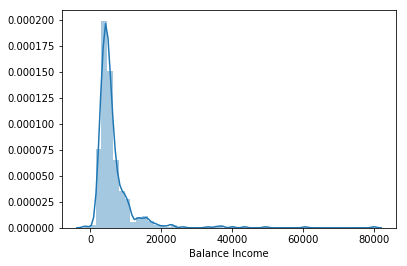

In [457]:
# Balance Income feature
loan_data['Balance Income']=loan_data['Total_Income']-(loan_data['EMI']) 
sns.distplot(loan_data['Balance Income']);

Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the loan_dataing dataset.

In [458]:
loan_data=loan_data.drop('Loan_ID',axis=1)

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the loan_data dataset and save it in another dataset.

In [459]:
x = loan_data.drop('Loan_Status',1)
y = loan_data.Loan_Status

Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:

Consider the “Gender” variable. It has two classes, Male and Female.
As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.
Once we apply dummies to this variable, it will convert the “Gender” variable into two variables(Gender_Male and Gender_Female), one for each class, i.e. Male and Female.
Gender_Male will have a value of 0 if the gender is Female and a value of 1 if the gender is Male.

In [460]:
x=pd.get_dummies(x)
loan_data=pd.get_dummies(loan_data)

## Split the data into loan_data and test

In [461]:
#Split the data
from sklearn.model_selection import train_test_split

X_loan_data,X_test,y_loan_data,y_test= train_test_split(x,y,test_size= 0.3,random_state= 5)

## Model Building

### 1. Logistic Regression

Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.
<br>
Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.
<br>
This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function

In [462]:
# fit model
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=1)
classifier.fit(X_loan_data,y_loan_data)
pred= classifier.predict(X_test)

from sklearn import metrics as m
# Accuracy
acc= m.accuracy_score(y_test,pred)
acc

0.8378378378378378

So our predictions are almost 84% accurate, i.e. we have identified 84% of the loan status correctly.

### 2. Decision Tree

Decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on most significant splitter / differentiator in input variables.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

For detailed explanation visit https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/#six

In [463]:
# fit model

from sklearn import tree
classifier= tree.DecisionTreeClassifier(random_state=1)
classifier.fit(X_loan_data,y_loan_data)
pred= classifier.predict(X_test)

from sklearn import metrics as m
# Accuracy
acc= m.accuracy_score(y_test,pred)
acc

0.7243243243243244

We got an accuracy of 0.70 which is much lesser than the accuracy from logistic regression model. So let’s build another model, i.e. Random Forest, a tree based ensemble algorithm and try to improve our model by improving the accuracy.

### 3. Random Forest

RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.<br>
For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.<br>
Final prediction can be a function of all the predictions made by the individual learners.<br>
In case of regression problem, the final prediction can be mean of all the predictions.<br>
For detailed explanation visit this article https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/

In [464]:
# fit model
from sklearn.ensemble import RandomForestClassifier 
classifier= RandomForestClassifier(n_estimators= 700)
classifier.fit(X_loan_data,y_loan_data)
pred= classifier.predict(X_test)

from sklearn import metrics as m
# Accuracy
acc= m.accuracy_score(y_test,pred)
acc

0.8216216216216217

We got an accuracy of 0.81 from the random forest model .

### Important Variables

Let us find the feature importance now, i.e. which features are most important for this problem. We will use feature_importances_ attribute of sklearn to do so.

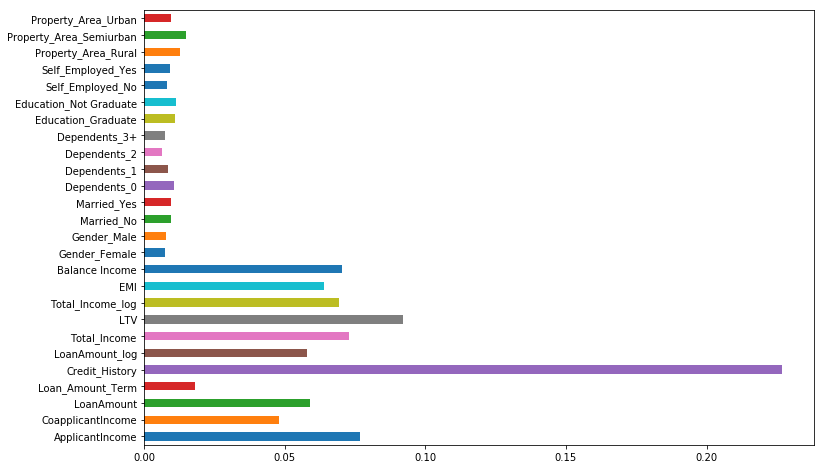

In [465]:
# importances=pd.Series(classifier.feature_importances_, index=x.columns)
# importances.plot(kind='barh', figsize=(12,8))

importances=pd.Series(classifier.feature_importances_, index=x.columns)
importances.plot(kind='barh', figsize=(12,8))

# features = x.columns
# importances = pd.Series(classifier.feature_importances_, index=x.columns)
# indices = np.argsort(importances)

# plt.title('Feature Importances')
# plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), [features[i] for i in indices])
# plt.xlabel('Relative Importance')
# plt.show()

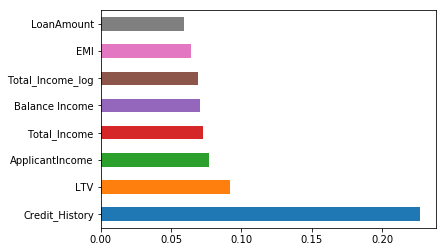

In [466]:
(pd.Series(classifier.feature_importances_, index=x.columns)
   .nlargest(8)
   .plot(kind='barh')) 